In [7]:
# True p(x) = N(0, 1)

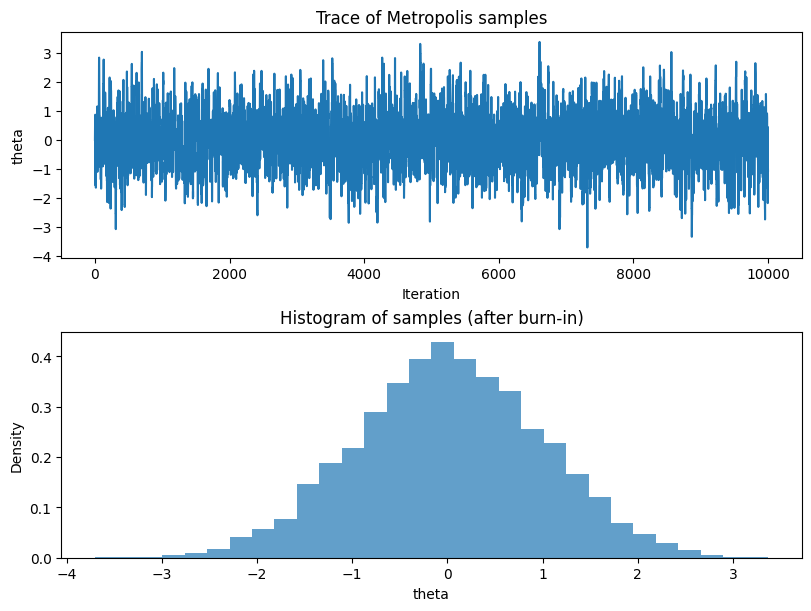

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1.0
state = [0.0]

def p(theta):
    return np.exp(-0.5 * theta ** 2)

for _ in range(10000):
    theta_star = np.random.normal(state[-1], sigma)
    accept_ratio = p(theta_star) / p(state[-1])
    accept_prob = min(1.0, accept_ratio)
    if np.random.rand() < accept_prob:
        state.append(theta_star)
    else:
        state.append(state[-1])

state_arr = np.array(state)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)
ax[0].plot(state_arr)
ax[0].set_title('Trace of Metropolis samples')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('theta')

burn_in = int(0.1 * len(state_arr))
ax[1].hist(state_arr[burn_in:], bins=30, density=True, alpha=0.7)
ax[1].set_title('Histogram of samples (after burn-in)')
ax[1].set_xlabel('theta')
ax[1].set_ylabel('Density')

plt.show()
